In [1]:
# Basic librairies (all the librairies used for the machine learning are imported in the tools.py file)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ardl import ARDL
from pmdarima.preprocessing import BoxCoxEndogTransformer
from pmdarima.pipeline import Pipeline

from warnings import filterwarnings

from pmdarima.utils import tsdisplay
filterwarnings('ignore')

In [2]:
# Import all functions we build to process our predictions. All the functions are in the DreamLib folder
from DreamLib.processing_datas import *
from DreamLib.timeseries import *
import datas.selected_columns as cl

In [3]:
# Data importation
data = pd.read_sas("datas/total_red.sas7bdat")
# Useful to plot the model 
index = data.set_index('TRIMESTRE').index.unique()

# Functions

# Focus on chronique total

Then for chronique totale we will build and plot all models for each type of features selection.

In [4]:
start = 1
chronique = b"Totale"
period = 12

## With col_totale_corr

For the correlation feature selection we clean the data, build and find the best ARIMA model.

In [5]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start, period=period, chronique=chronique,col_used=cl.col_totale_corr,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -4.402
P-value for the series y_diff1: 0.00029
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



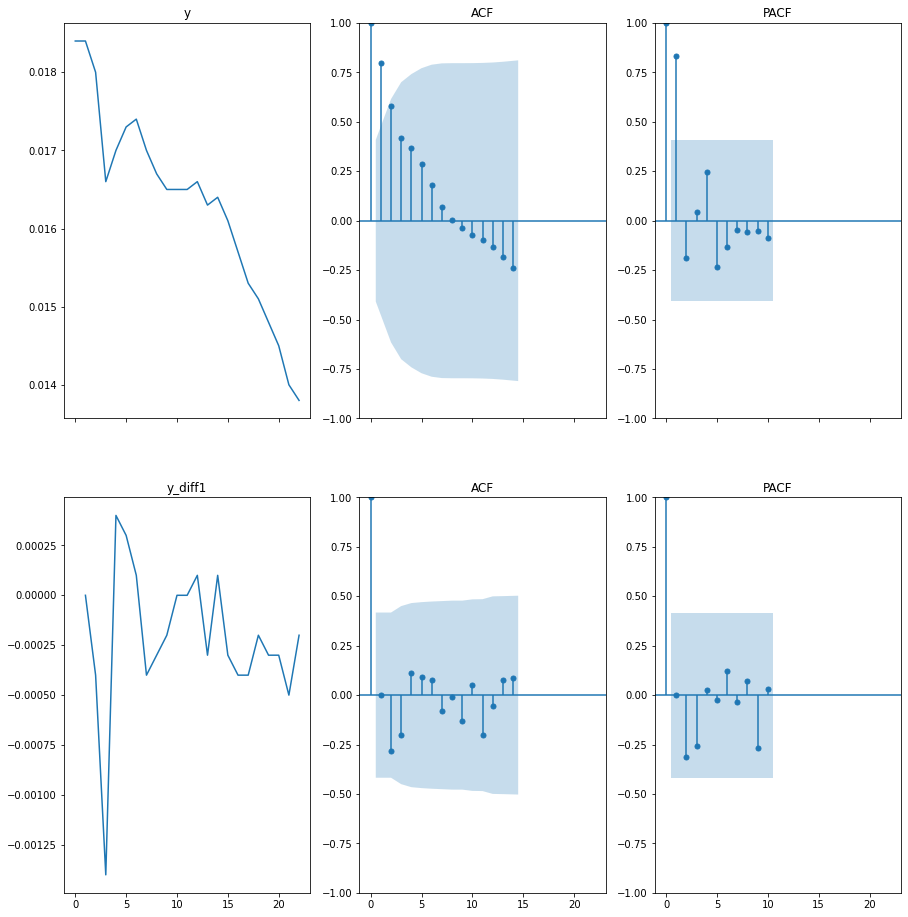

1

In [6]:
acf_pacf(y_train,alpha=0.05)


Test statistic for the series y_diff1: -4.402
P-value for the series y_diff1: 0.00029
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-328.625, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-356.597, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-356.034, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-356.147, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-311.711, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-354.912, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.229 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 199.299

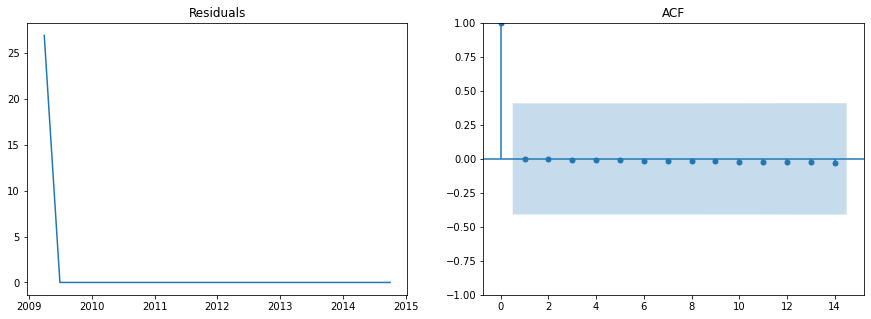


Test statistic for the residuals: -3.369
P-value for the residuals: 0.01205
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



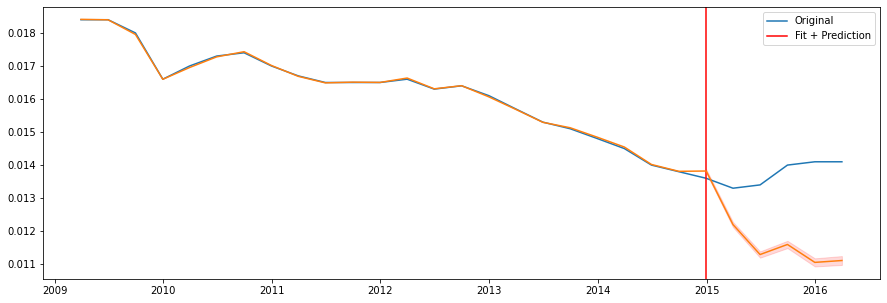

In [7]:
model = find_arimax_params(y_train,exog=X_train)
plot_arimax_fit(model,y_train,y_test=y_test,exog_train=X_train,exog_test=X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_low_var

For the low variance feature selection we clean the data, build and find the best ARIMA model.

In [8]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period, chronique=chronique,col_used=cl.col_totale_low_var,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -4.402
P-value for the series y_diff1: 0.00029
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-366.947, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-374.947, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-372.947, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-372.947, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-376.947, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-370.947, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.756 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 222.474

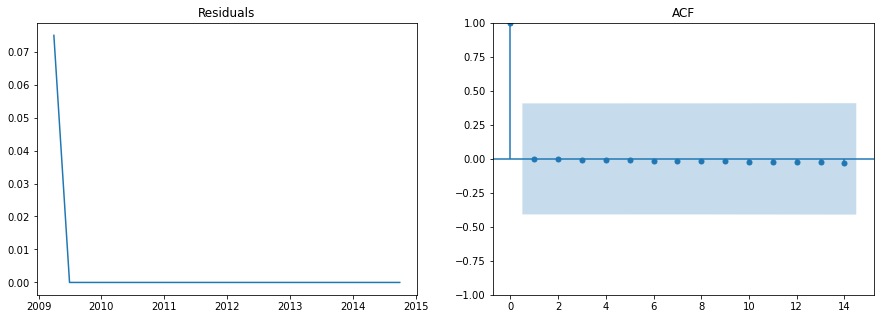


Test statistic for the residuals: -1.53
P-value for the residuals: 0.51873
The residuals are not stationary. We accept the hypothesis of a unit root.



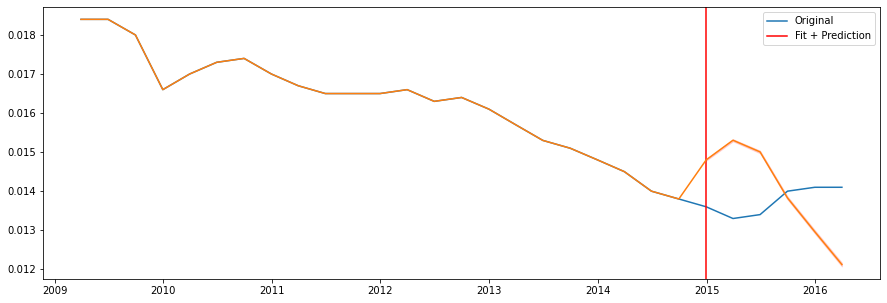

In [9]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_kbest

For the kbest feature selection we clean the data, build and find the best ARIMA model.

In [10]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period, chronique=chronique,col_used=cl.col_totale_kbest,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -4.402
P-value for the series y_diff1: 0.00029
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-324.226, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-332.376, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-330.634, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-330.313, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-287.346, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-328.374, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.551 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 188.188

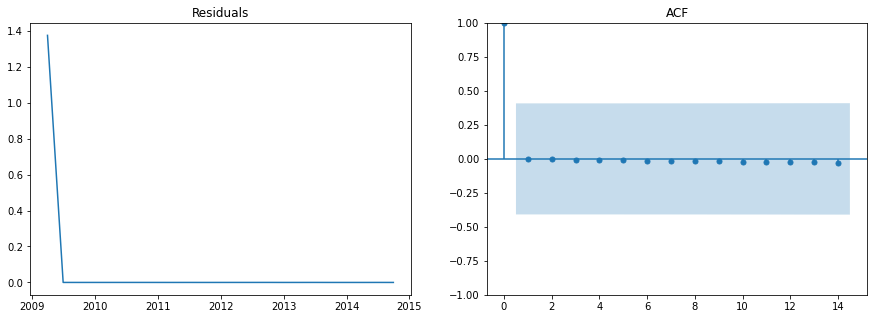


Test statistic for the residuals: -1.722
P-value for the residuals: 0.41997
The residuals are not stationary. We accept the hypothesis of a unit root.



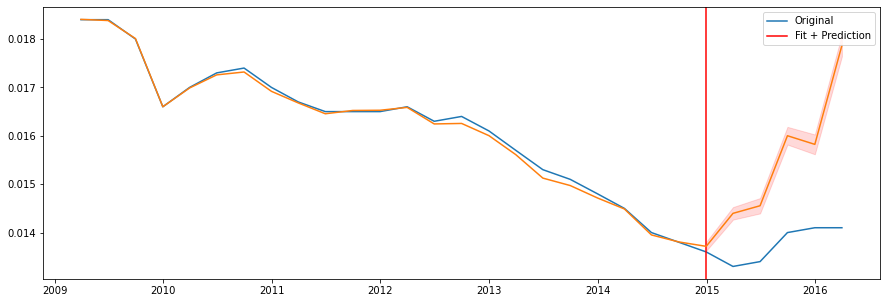

In [11]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_recur

For the recursive feature selection we clean the data, build and find the best ARIMA model.

In [12]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start, period=period,chronique=chronique,col_used=cl.col_totale_recur,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -4.402
P-value for the series y_diff1: 0.00029
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-391.009, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.365 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 222.505
Date:                Mon, 12 

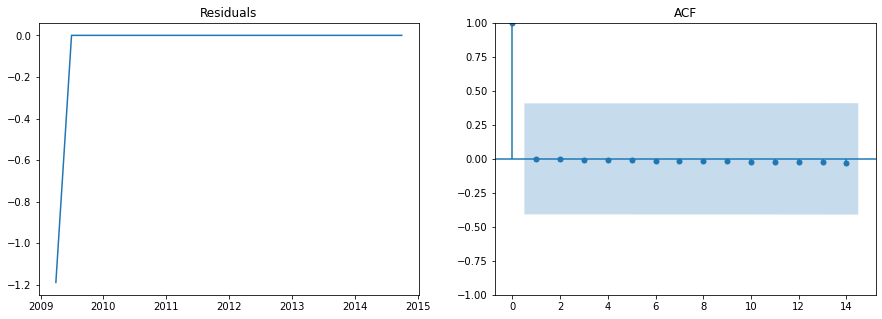


Test statistic for the residuals: 0.105
P-value for the residuals: 0.96641
The residuals are not stationary. We accept the hypothesis of a unit root.



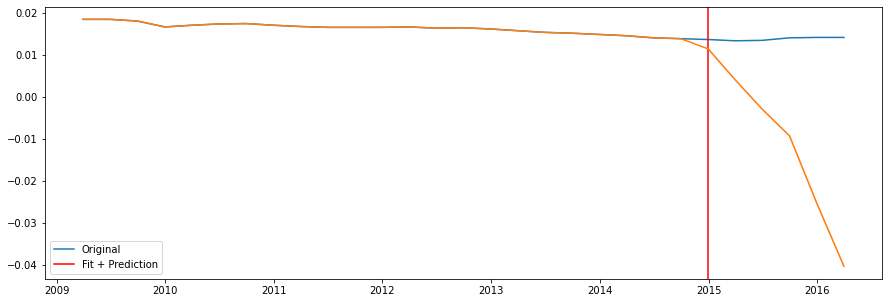

In [13]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_sfm

For the select from model feature selection we clean the data, build and find the best ARIMA model.

In [14]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_totale_sfm,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -4.402
P-value for the series y_diff1: 0.00029
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-131.132, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-282.364, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-281.515, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-283.701, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-237.008, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-275.656, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-210.466, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-210.446, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-284.512, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-242.094, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-280.66

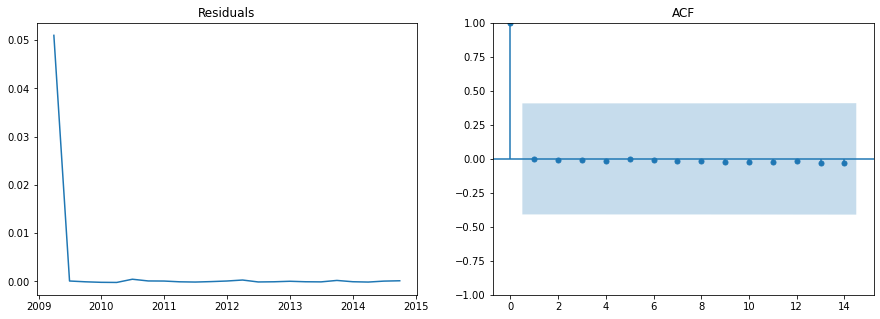


Test statistic for the residuals: -1.012
P-value for the residuals: 0.74876
The residuals are not stationary. We accept the hypothesis of a unit root.



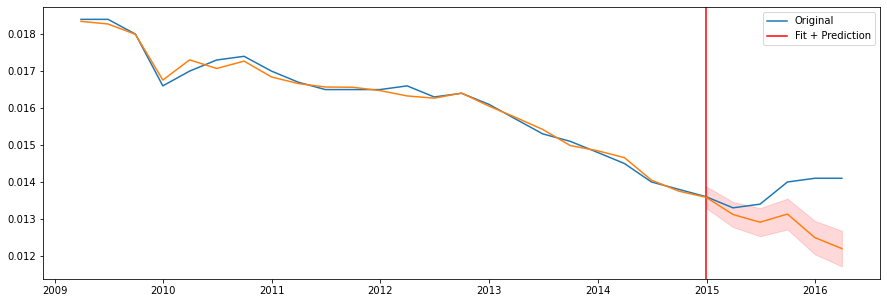

In [15]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_tree

For the tree-based feature selection we clean the data, build and find the best ARIMA model.

In [16]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_totale_tree,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -4.402
P-value for the series y_diff1: 0.00029
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-395.490, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-392.947, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-391.336, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-391.359, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-394.947, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-393.367, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-405.064, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-389.314, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-389.431, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-385.313, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-387.30

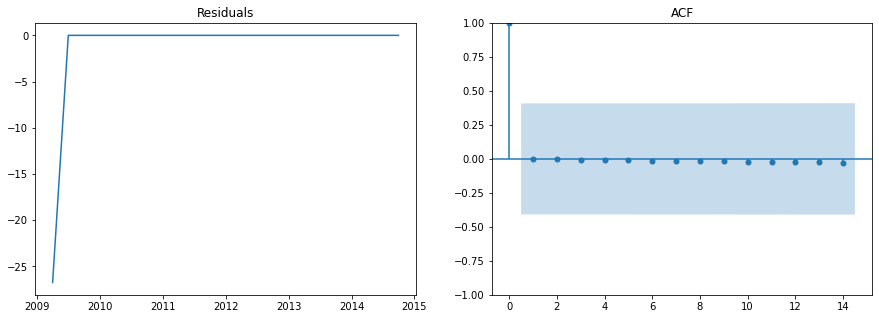


Test statistic for the residuals: -2.668
P-value for the residuals: 0.07967
The residuals are not stationary. We accept the hypothesis of a unit root.



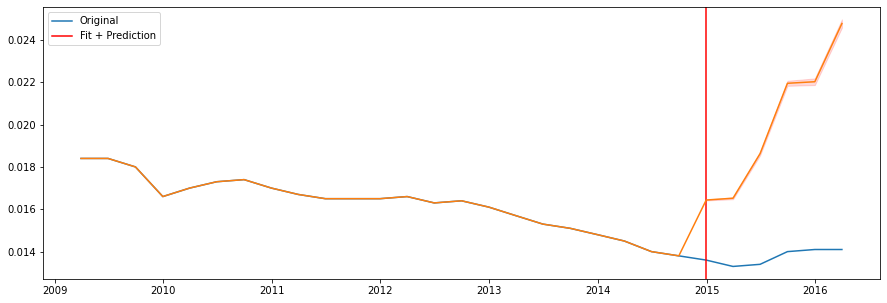

In [17]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_seq_for

For the sequential feature selection we clean the data, build and find the best ARIMA model.

In [18]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_totale_seq_for,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -4.402
P-value for the series y_diff1: 0.00029
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-251.351, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-281.490, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-280.268, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-280.334, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-232.542, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-277.597, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.908 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 162.745

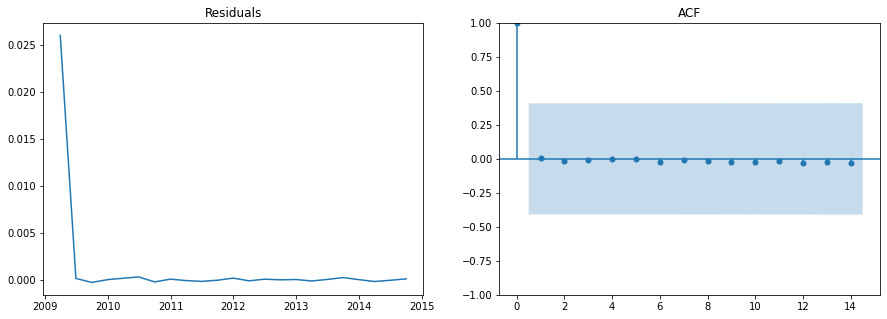


Test statistic for the residuals: -4.51
P-value for the residuals: 0.00019
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



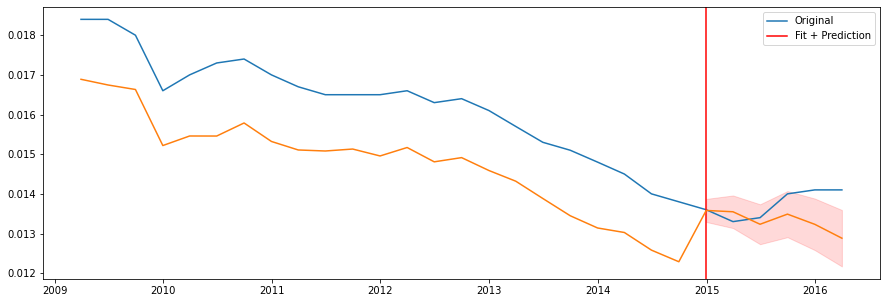

In [19]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_seq_bac

For the backward feature selection we clean the data, build and find the best ARIMA model.

In [20]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_totale_seq_bac,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -4.402
P-value for the series y_diff1: 0.00029
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-296.675, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-304.428, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-302.749, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-302.615, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-259.376, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-300.232, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.546 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 174.214

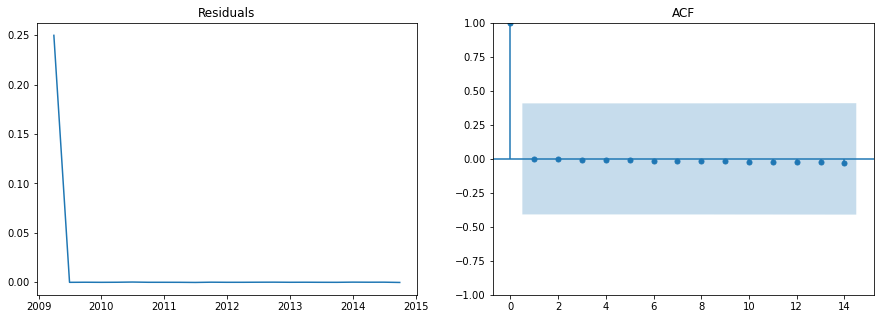


Test statistic for the residuals: -2683.476
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



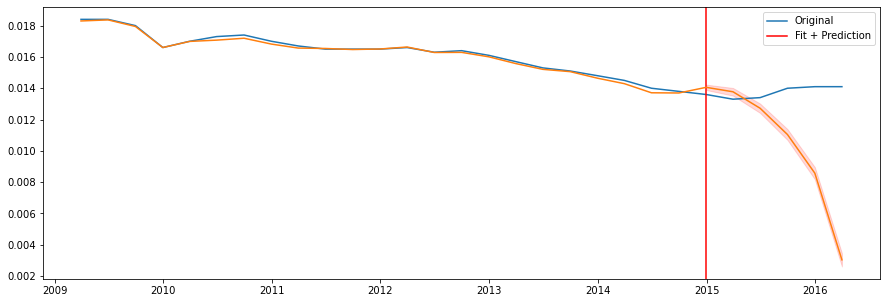

In [21]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

# Focus on chronique CHR2

Then for chronique CHR2 we will build and plot all models for each type of features selection.

In [22]:
start = 1
period = 12
chronique = b"CHR2"

## With col_totale_corr

In [23]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_corr,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -7.255
P-value for the series y_diff2: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



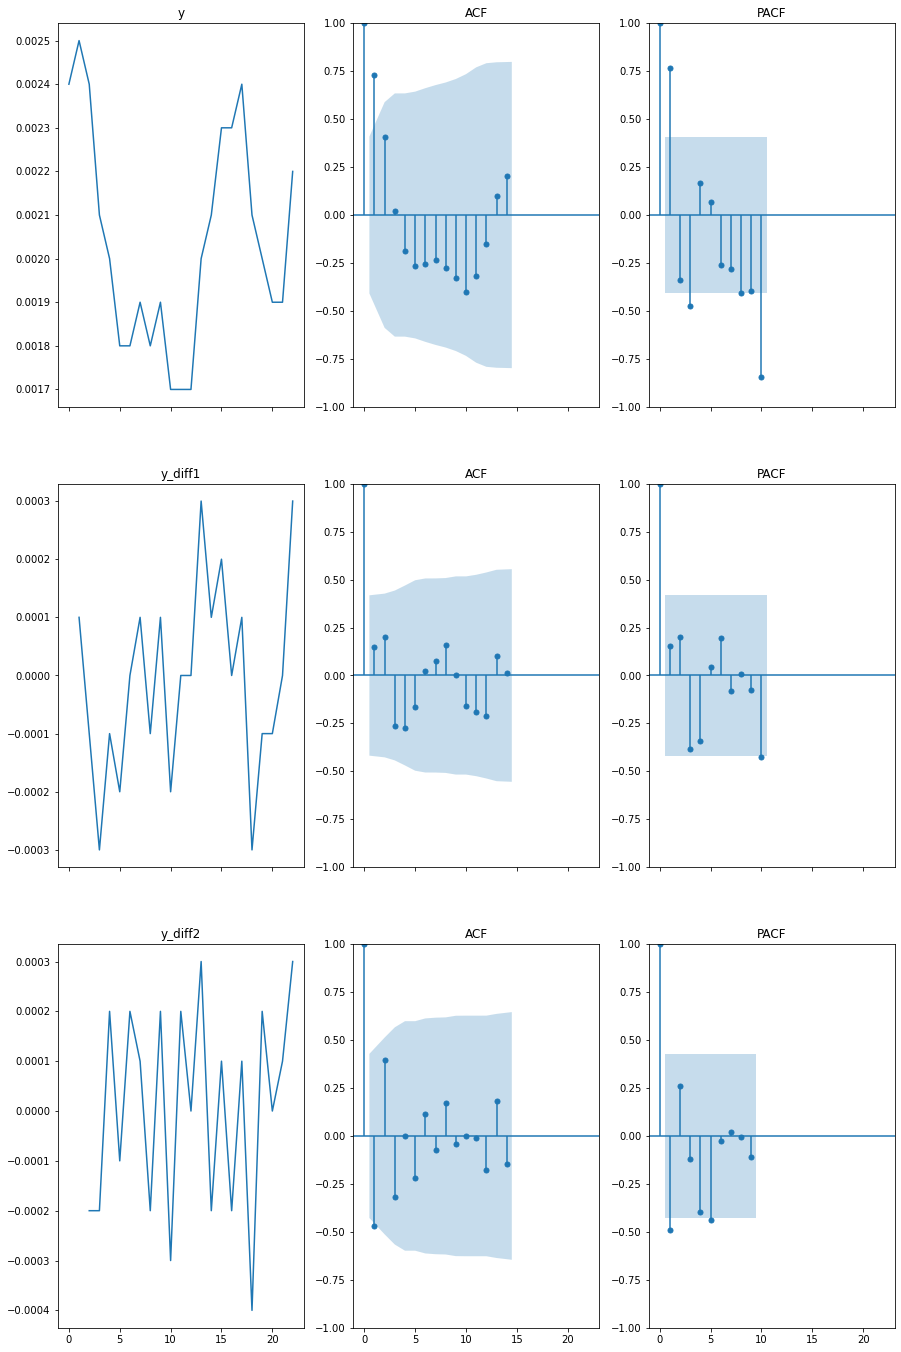

2

In [24]:
acf_pacf(y_train,alpha=0.05)


Test statistic for the series y_diff2: -7.255
P-value for the series y_diff2: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-274.550, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-288.163, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-291.562, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-292.213, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-246.175, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-289.714, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-292.420, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-290.387, Time=0.05 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-273.690, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-267.872, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-294.902, T

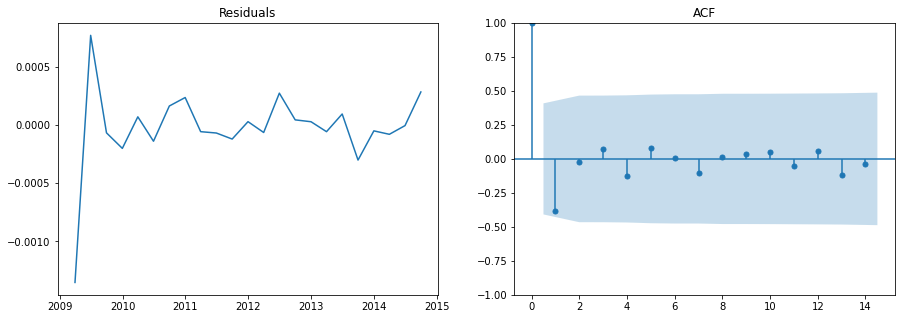


Test statistic for the residuals: -5.883
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



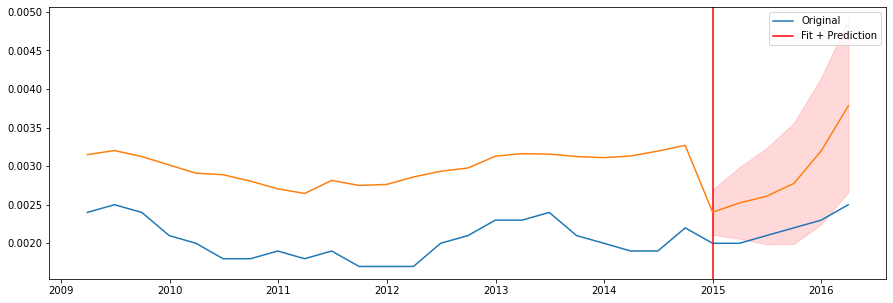

In [25]:
model = find_arimax_params(y_train,exog=X_train)
plot_arimax_fit(model,y_train,y_test=y_test,exog_train=X_train,exog_test=X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_low_var

In [26]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_low_var,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -7.255
P-value for the series y_diff2: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-362.102, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-370.102, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-368.102, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-368.102, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-372.102, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-366.102, Time=0.14 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.828 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 222.051
Dat

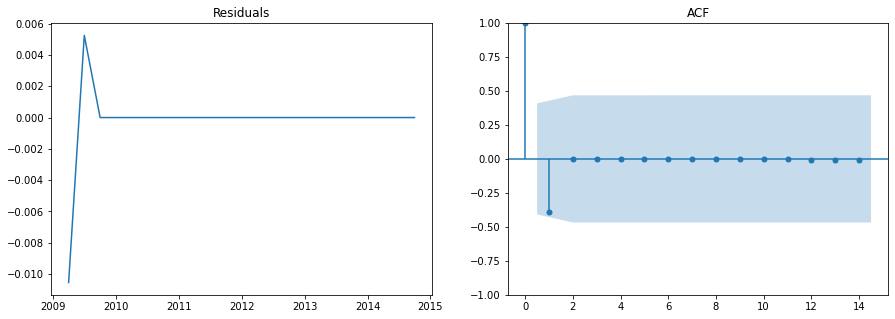


Test statistic for the residuals: -32.555
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



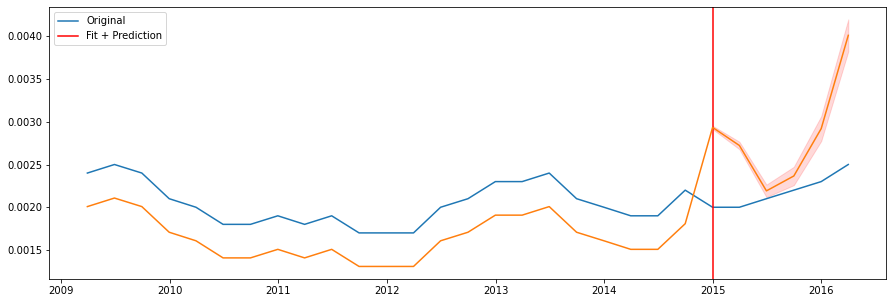

In [27]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_kbest

In [28]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_kbest,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -7.255
P-value for the series y_diff2: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-329.902, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-343.260, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-343.498, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-325.282, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-295.368, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-344.471, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-342.444, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-342.459, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-343.873, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-340.292, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-341.070, T

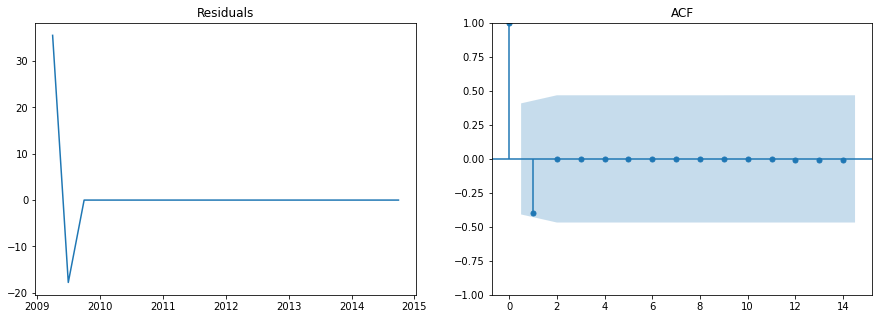


Test statistic for the residuals: -0.625
P-value for the residuals: 0.86515
The residuals are not stationary. We accept the hypothesis of a unit root.



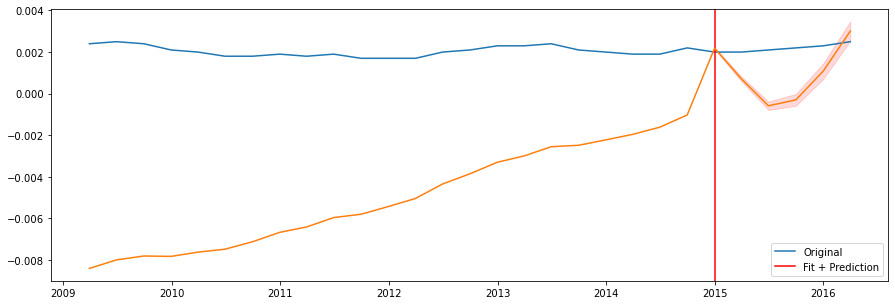

In [29]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_recur

In [30]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_recur,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -7.255
P-value for the series y_diff2: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-283.003, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-287.845, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-288.837, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-288.448, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-289.830, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-286.689, Time=0.08 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.737 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 160.915
Dat

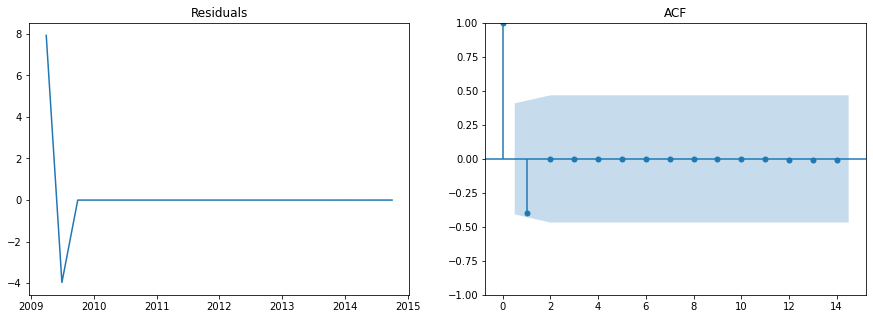


Test statistic for the residuals: -2.268
P-value for the residuals: 0.18256
The residuals are not stationary. We accept the hypothesis of a unit root.



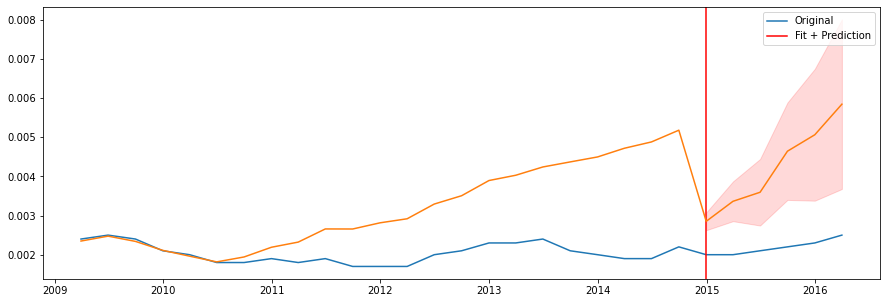

In [31]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_sfm

In [32]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_sfm,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -7.255
P-value for the series y_diff2: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-375.587, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-356.200, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-379.860, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-352.685, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-314.117, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3.339, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-381.521, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-380.157, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-379.885, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-308.353, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-383.612, Time

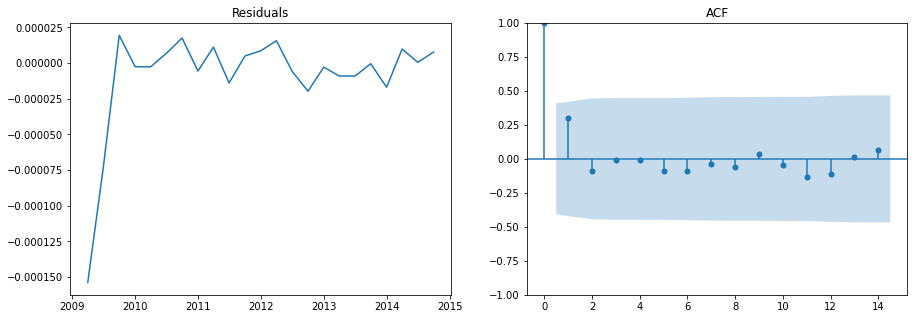


Test statistic for the residuals: -7.608
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



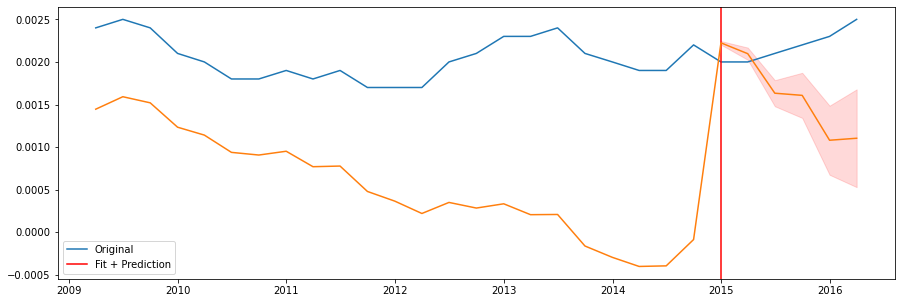

In [33]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_tree

In [34]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_tree,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -7.255
P-value for the series y_diff2: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-277.594, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-286.351, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-284.610, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-284.470, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-243.223, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-282.552, Time=0.07 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.405 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 159.175
Dat

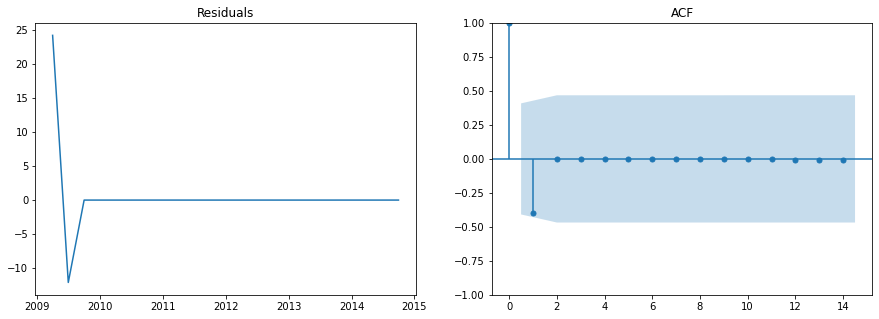


Test statistic for the residuals: -32.402
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



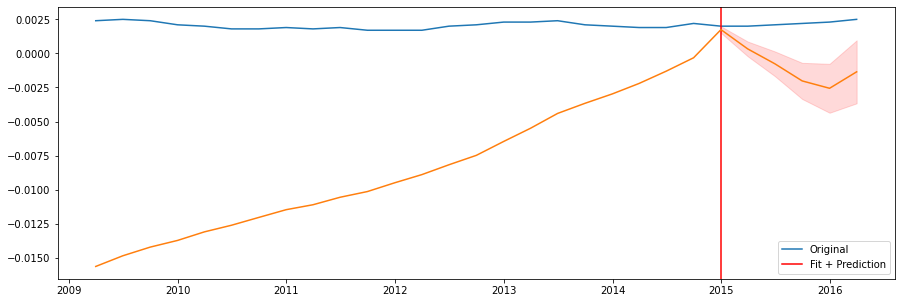

In [35]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_seq_for

In [36]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_seq_for,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -7.255
P-value for the series y_diff2: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-277.720, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-283.956, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-281.951, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-281.729, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-241.737, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-279.635, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.659 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 163.978
Dat

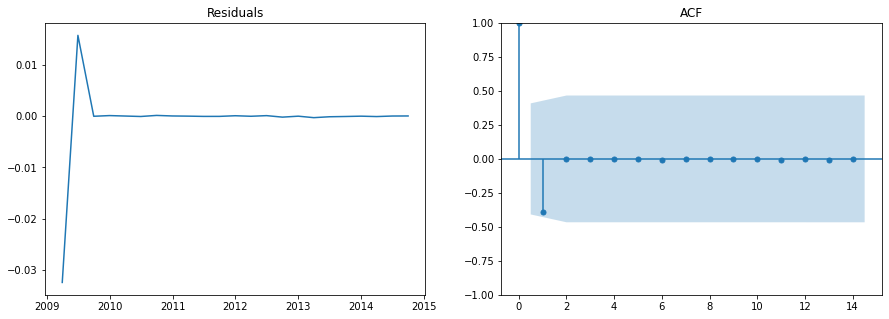


Test statistic for the residuals: -1.687
P-value for the residuals: 0.43795
The residuals are not stationary. We accept the hypothesis of a unit root.



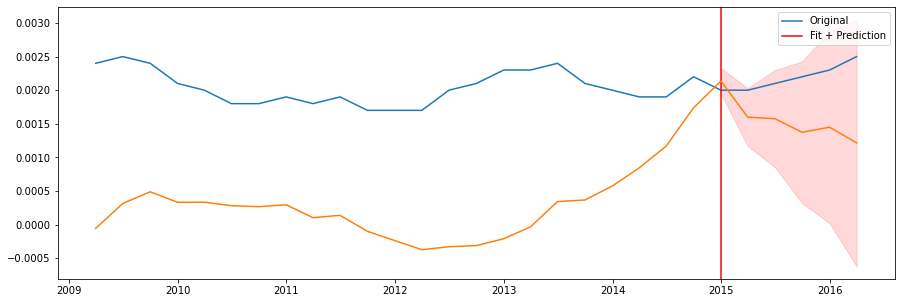

In [37]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_seq_bac

In [38]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_seq_bac,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -7.255
P-value for the series y_diff2: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-389.349, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-379.176, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-391.777, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-388.584, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-328.573, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=16.619, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-2.606, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-387.183, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=21.671, Time=0.08 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0] intercept
Total fit time: 0.817 seconds
                               SARIMAX Results  

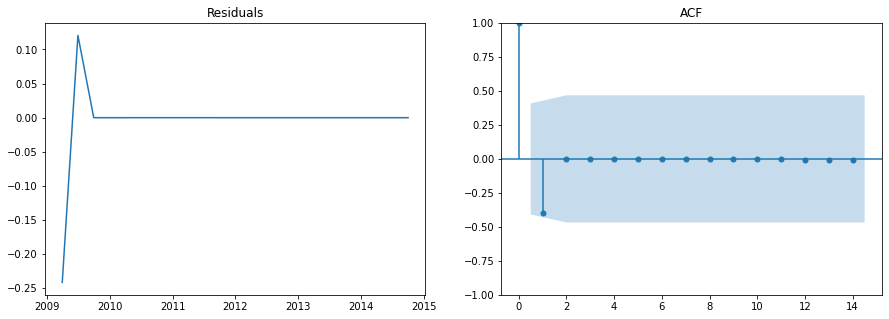


Test statistic for the residuals: -7144.545
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



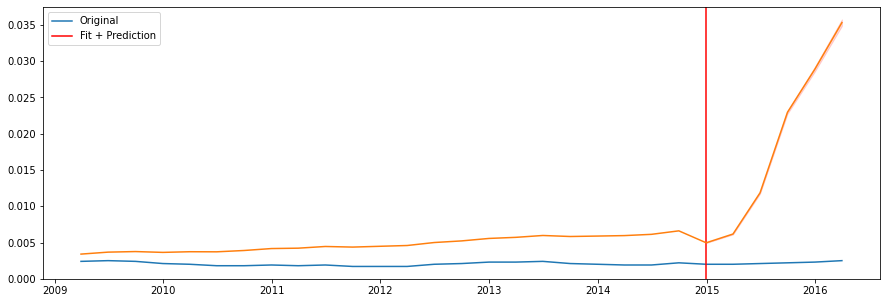

In [39]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

# Focus on chronique CHR8

In [40]:
start = 2
chronique =b"CHR8"
period = 12

## With col_totale_corr

In [41]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_corr,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.383
P-value for the series y_diff1: 0.01156
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



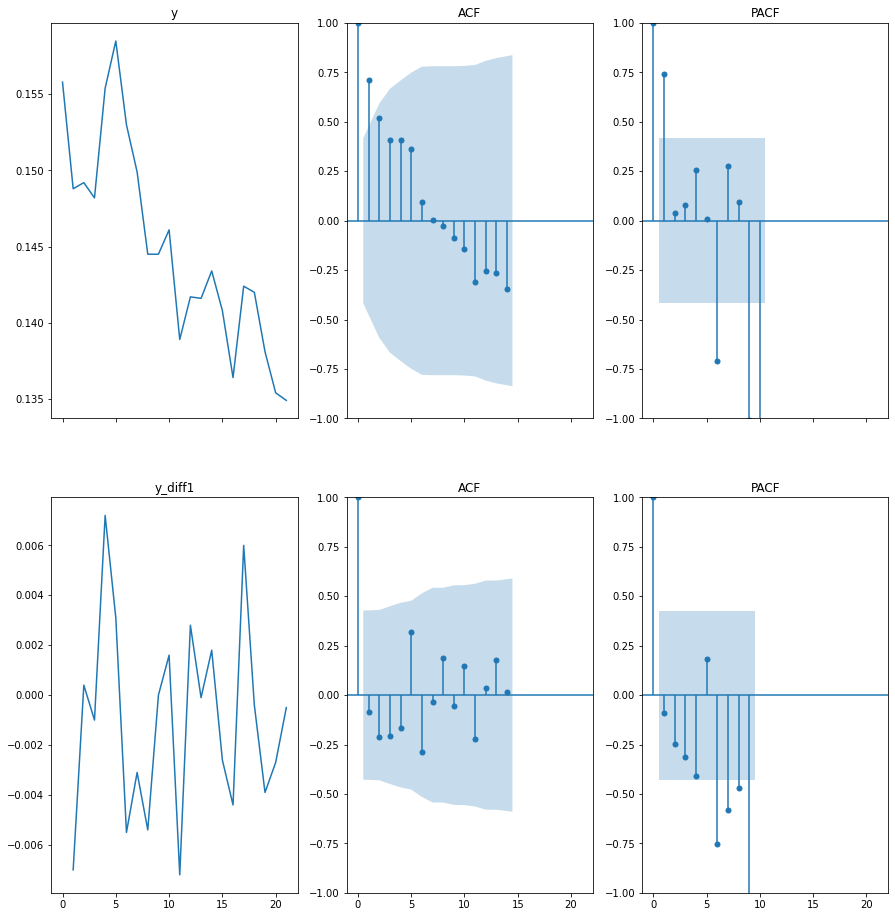

1

In [42]:
acf_pacf(y_train,alpha=0.05)


Test statistic for the series y_diff1: -3.383
P-value for the series y_diff1: 0.01156
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-141.331, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-160.907, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-158.746, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-158.260, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-118.971, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-156.059, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.483 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  88.454

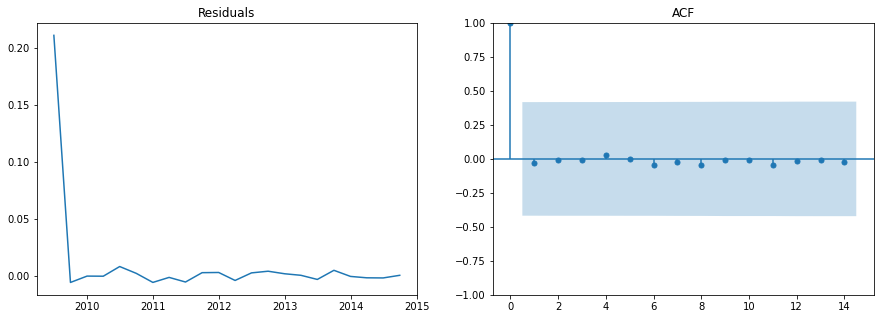


Test statistic for the residuals: -3.754
P-value for the residuals: 0.00342
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



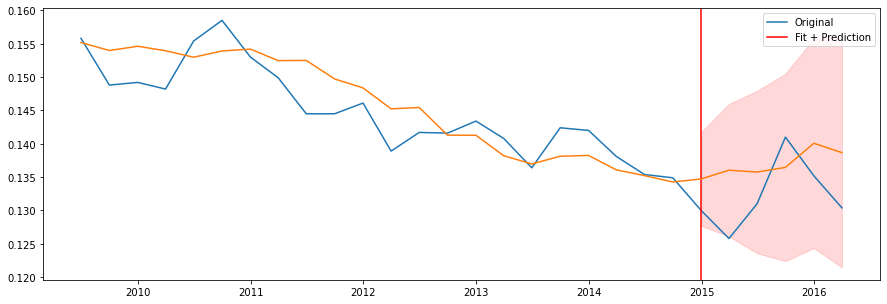

In [43]:
model = find_arimax_params(y_train,exog=X_train)
plot_arimax_fit(model,y_train,y_test=y_test,exog_train=X_train,exog_test=X_test)

The best model is :

$$
ARIMA(1,5,0)
$$

## With col_totale_low_var

In [44]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_low_var,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.383
P-value for the series y_diff1: 0.01156
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-345.429, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-353.759, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-351.157, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-351.474, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-355.759, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-349.373, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.822 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 211.880

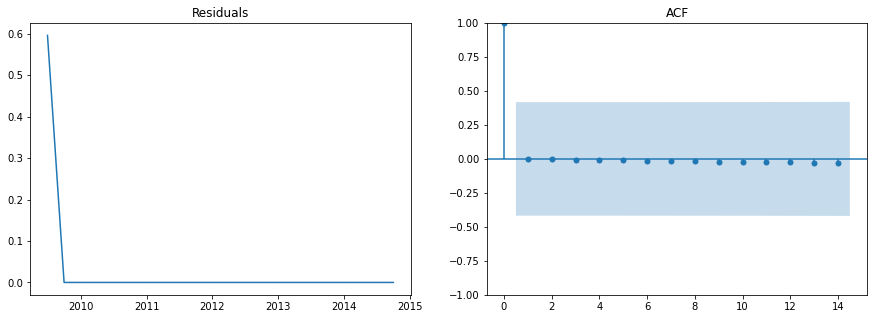


Test statistic for the residuals: -2.194
P-value for the residuals: 0.20844
The residuals are not stationary. We accept the hypothesis of a unit root.



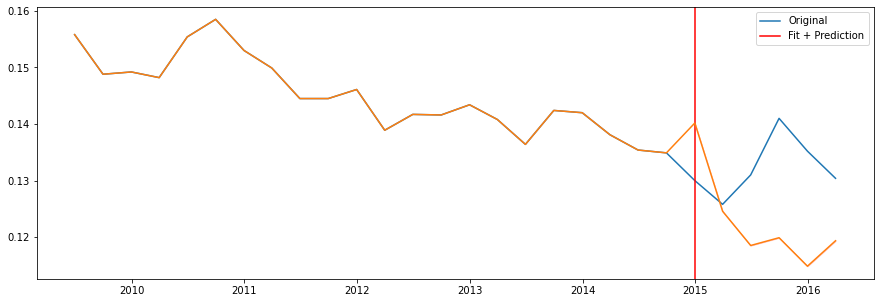

In [45]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_kbest

In [46]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_kbest,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.383
P-value for the series y_diff1: 0.01156
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-177.730, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-179.901, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-178.366, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-178.588, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-137.946, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-174.862, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.956 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 111.951

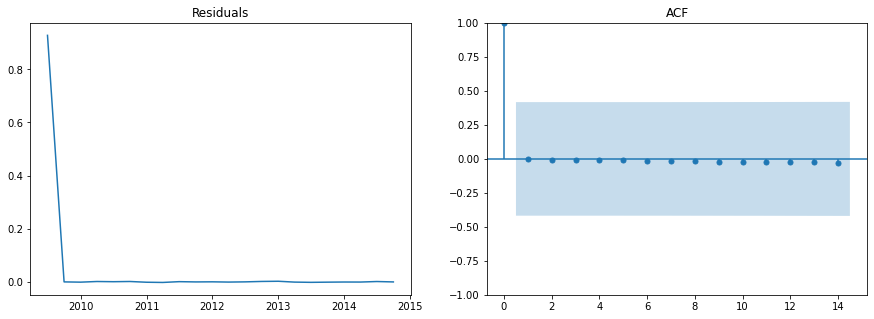


Test statistic for the residuals: -1.708
P-value for the residuals: 0.42715
The residuals are not stationary. We accept the hypothesis of a unit root.



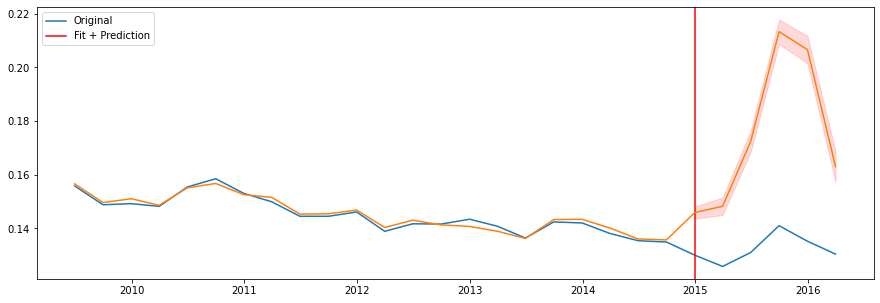

In [47]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_recur

In [48]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_recur,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.383
P-value for the series y_diff1: 0.01156
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-166.282, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-166.952, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-164.977, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-165.056, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-168.945, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-163.315, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.811 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 100.472

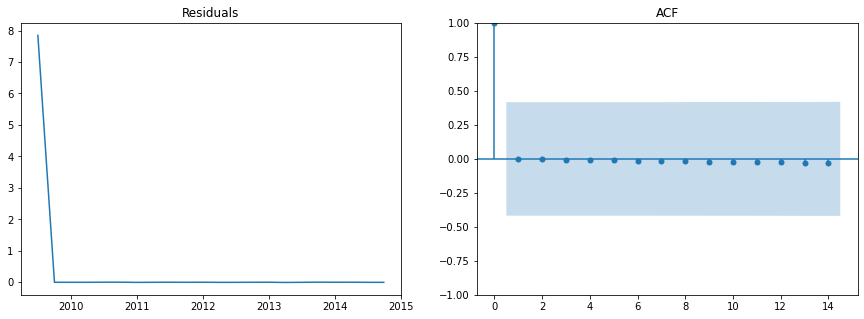


Test statistic for the residuals: -90.079
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



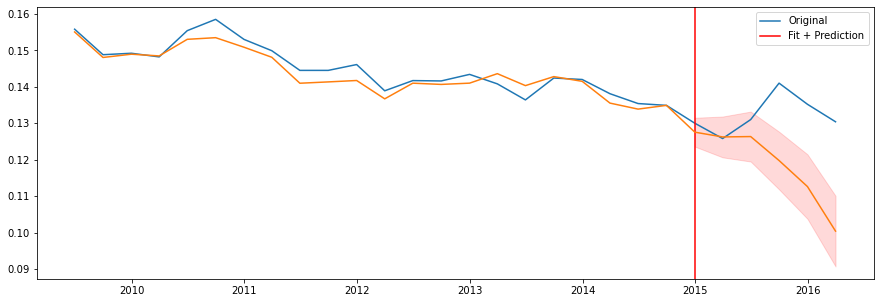

In [49]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_sfm

In [50]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_sfm,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.383
P-value for the series y_diff1: 0.01156
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-367.759, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-375.759, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-373.759, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-373.759, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-377.759, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-371.759, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.574 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 211.880

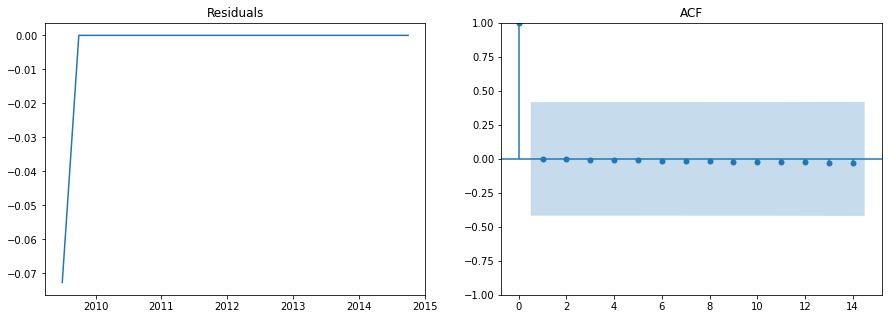


Test statistic for the residuals: -2.063
P-value for the residuals: 0.25953
The residuals are not stationary. We accept the hypothesis of a unit root.



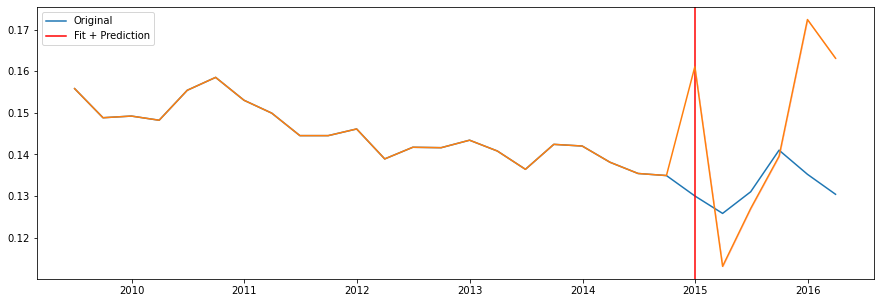

In [51]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_tree

In [52]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_tree,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.383
P-value for the series y_diff1: 0.01156
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-201.709, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-375.759, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-374.103, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-374.118, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-377.759, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-372.119, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.589 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 211.880

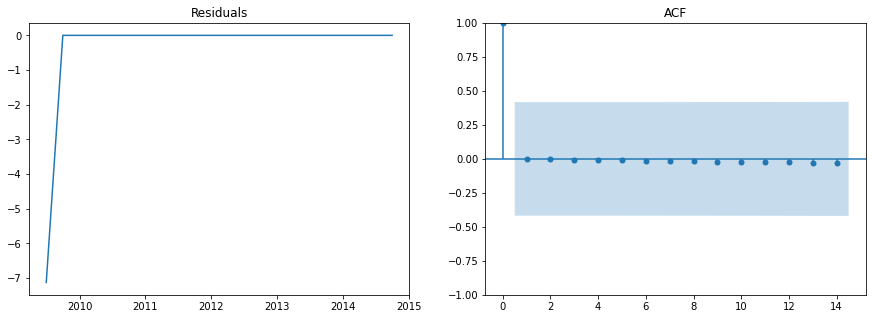


Test statistic for the residuals: -1.984
P-value for the residuals: 0.29375
The residuals are not stationary. We accept the hypothesis of a unit root.



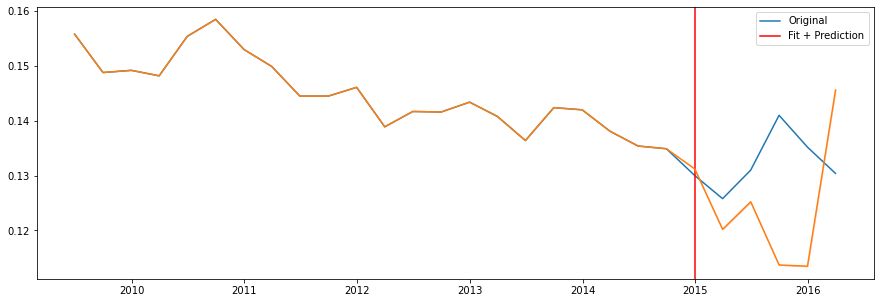

In [53]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_seq_for

In [54]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_seq_for,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.383
P-value for the series y_diff1: 0.01156
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-12.850, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-184.185, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-183.644, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-183.640, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-141.497, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-179.800, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.854 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 114.093


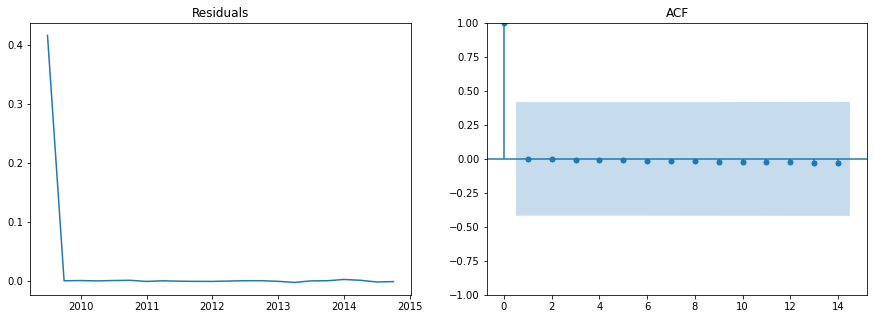


Test statistic for the residuals: -3.822
P-value for the residuals: 0.00269
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



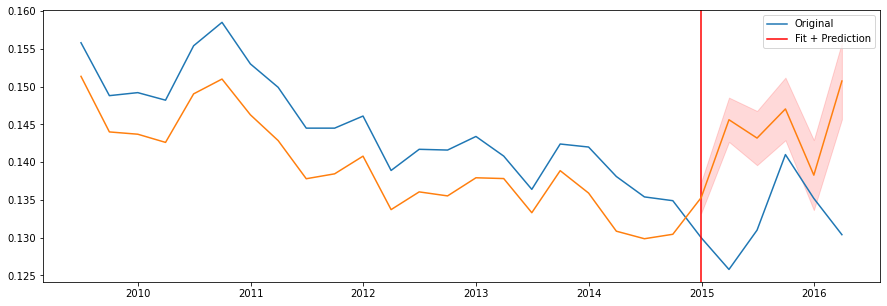

In [55]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_seq_bac

In [56]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_seq_bac,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.383
P-value for the series y_diff1: 0.01156
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-268.371, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-280.056, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-278.028, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-277.867, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-230.926, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-275.831, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.510 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 162.028

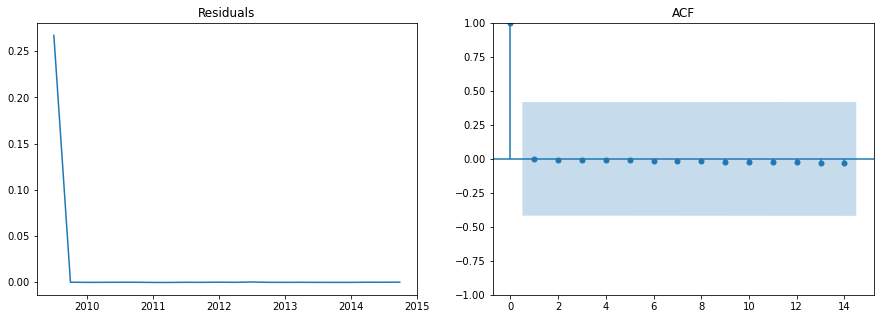


Test statistic for the residuals: -2.807
P-value for the residuals: 0.05728
The residuals are not stationary. We accept the hypothesis of a unit root.



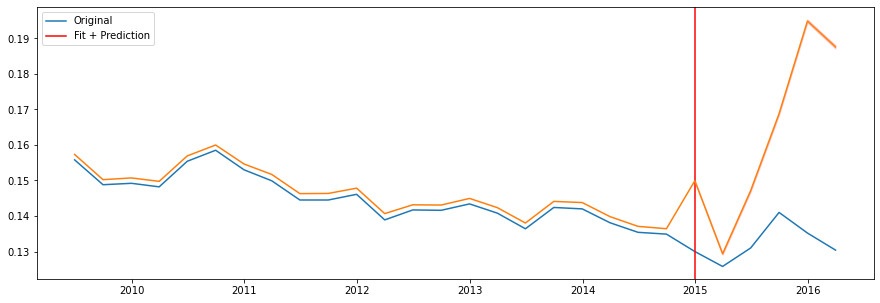

In [57]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$